# Task 2

### Victor Onofre

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector, partial_trace
import random
import numpy as np 
import matplotlib

In [2]:
backend_statevector = BasicAer.get_backend('statevector_simulator')# This backend executes a single shot of a Qiskit QuantumCircuit and returns the final quantum statevector of the simulation.
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

In [3]:
backend_qasm = BasicAer.get_backend('qasm_simulator')# This backend is designed to mimic an actual device. 
                                                     #It executes a Qiskit QuantumCircuit and returns a count dictionary containing the final values of any classical registers in the circuit. 
shots = 1024 #Number of individual shots 

# Part 1: Build the circuit to prepare the Bell state 

Build the following simple circuit to prepare the Bell state:

<img src="bellpair_circuit.png">

The initial state in the circuit is:

$$|\Psi_{0}> =  |0>_{0} |0>_{1}$$ 

Then the hadamard gate is apply in the qubit $|0>_{0}$

$$|\Psi_{1}> = (H \otimes I) |\Psi_{0}> =  H|0>_{0}I|0>_{1} = \Big[\frac{1}{\sqrt{2}} \Big(|0>_{0} +  |1>_{0} \Big) \Big] |0>_{1}  = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} +  |1>_{0}|0>_{1} \Big) $$ 

The CNOT gate is apply to the state $|\Psi_{1}>$

$$|\Psi_{2}> = CNOT_{01}|\Psi_{1}> =  \frac{1}{\sqrt{2}} \Big(CNOT_{01}|0>_{0}|0>_{1} +  CNOT_{01}|1>_{0}|0>_{1} \Big) = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} + |1>_{0}|1>_{1} \Big)  $$ 

The result is a entangled state

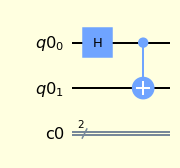

In [4]:
qreg = QuantumRegister(2)
registerBell = ClassicalRegister(2) 

qBell = QuantumCircuit(qreg,registerBell )

qBell.h(0)
qBell.cx(0,1)
qBell.draw(output='mpl', style=style)

We can see the result of the circuit in the qsphere

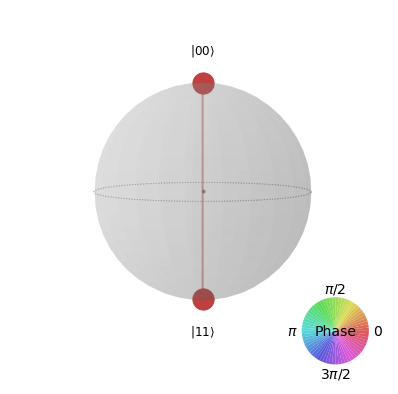

In [5]:
out_vectorBell = execute(qBell, backend_statevector).result().get_statevector()
plot_state_qsphere(out_vectorBell)

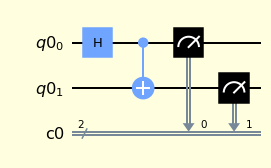

In [6]:
qBell.measure(qreg[0],registerBell [0])
qBell.measure(qreg[1],registerBell [1])
qBell.draw(output='mpl', style=style)

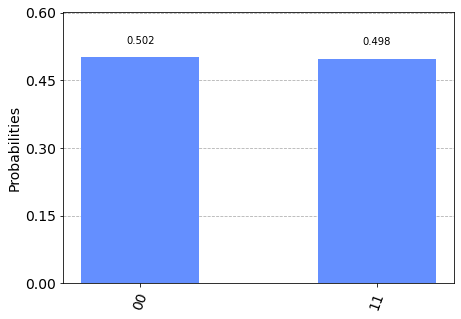

In [7]:
results = execute(qBell, backend=backend_qasm, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Part 2: Add an arbitrary “error gate” to the circuit

Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

In [8]:
def gate_errorX():
    ############################################################
    # This function will return ['X'] with a probability 0.2   #
    # ['Z'] with a probability 0.2                             #
    # and ['I'] with a probability 0.6                         #
    ##########################################################
    random_gate = random.choices(population= ['Z', 'X', 'I'],weights=[0.2,0.2, 0.6],k=1)
    
    return(random_gate)

In [9]:
def noise(qcirc):
    
    if gate_errorX() == ['X']:
    ### Bit-flip in the qubit 0 #####
        qcirc.x(0)
    elif gate_errorX() == ['Z']:
    ### phase-flip in the qubit 0 #####
        qcirc.z(0)
    else:
        qcirc.i(0)
        
    if gate_errorX() == ['X']:
    ### Bit-flip in the qubit 1 #####    
        qcirc.x(1)
    elif gate_errorX() == ['Z']:
    ### phase-flip in the qubit 0 #####
        qcirc.z(1)
    else:
        qcirc.i(1)
        
    return qcirc

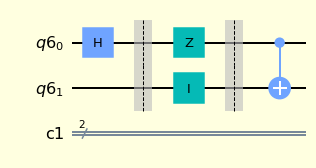

In [10]:
qregNoise = QuantumRegister(2)
registerBellNoise = ClassicalRegister(2) 
qBellNoise = QuantumCircuit(qregNoise,registerBellNoise )

qBellNoise.h(0)
qBellNoise.barrier()
noise(qBellNoise)
#qBellNoise.z(0)
qBellNoise.barrier()
qBellNoise.cx(0,1)

qBellNoise.draw(output='mpl', style=style)

We can see the effect of noise in the state, in this case a $z$ gate is apply to the  qubit 0:

$$|\Psi_{1}> = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} +  |1>_{0}|0>_{1} \Big) $$ 

$$|\Psi_{1}>_{Noise} = (Z \otimes I) |\Psi_{1}> = \frac{1}{\sqrt{2}} \Big(Z|0>_{0}I|0>_{1} +  Z|1>_{0}I|0>_{1} \Big) =  \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} - |1>_{0}|0>_{1} \Big)$$ 

The sign (phase) has been change in the state!

Again, we can see the result of the circuit in the qsphere

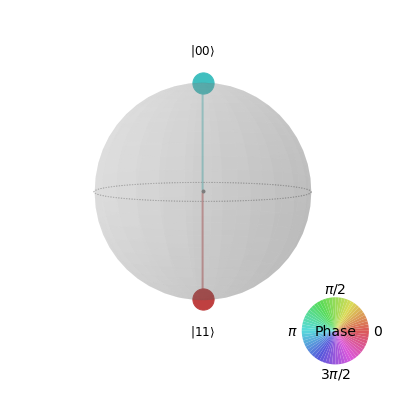

In [11]:
out_vectorBellNoise = execute(qBellNoise, backend_statevector).result().get_statevector()
plot_state_qsphere(out_vectorBellNoise)

Comparing with the state without noise

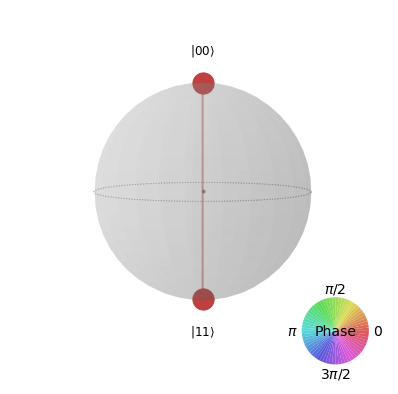

In [12]:
plot_state_qsphere(out_vectorBell)

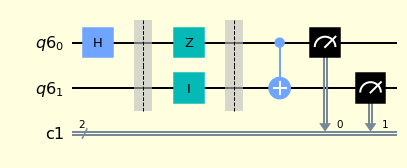

In [13]:
qBellNoise.measure(qregNoise[0],registerBellNoise[0])
qBellNoise.measure(qregNoise[1],registerBellNoise[1])
qBellNoise.draw(output='mpl', style=style)

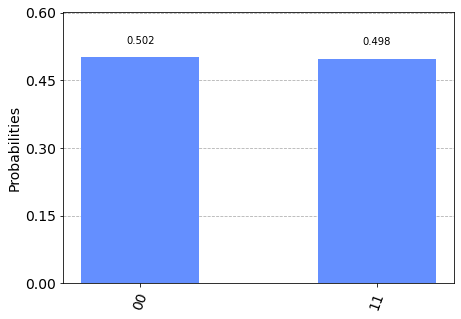

In [14]:
resultsNoise = execute(qBellNoise, backend=backend_qasm, shots=shots).result()
answerNoise = resultsNoise.get_counts()

plot_histogram(answerNoise)

## Noise in the qubit 1

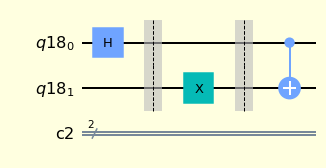

In [15]:
qreg_X1_Noise = QuantumRegister(2)
registerBell_X1_Noise = ClassicalRegister(2) 
qBell_X1_Noise = QuantumCircuit(qreg_X1_Noise,registerBell_X1_Noise )

qBell_X1_Noise.h(0)
qBell_X1_Noise.barrier()
#noise(qBellNoise)
qBell_X1_Noise.x(1)
qBell_X1_Noise.barrier()
qBell_X1_Noise.cx(0,1)

qBell_X1_Noise.draw(output='mpl', style=style)

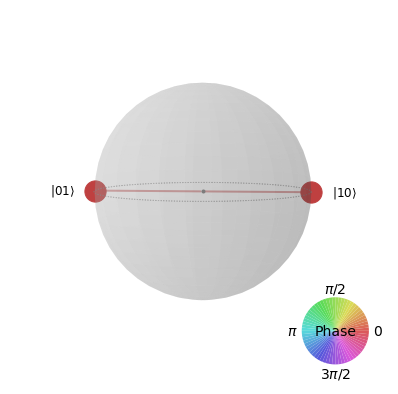

In [16]:
out_vectorBell_X1_Noise = execute(qBell_X1_Noise, backend_statevector).result().get_statevector()
plot_state_qsphere(out_vectorBell_X1_Noise)

# Part 3: Encode each of the two qubits with a sign-flip or a bit-flip code

Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the possible choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

# Part 3.1: The bit-flip code with the Toffoli gate

In [17]:
Qreg1 = QuantumRegister(1)
Qreg2 = QuantumRegister(2)

qc_bit_flip = QuantumCircuit(Qreg1,Qreg2)

In [18]:
state_to_protect = [np.sqrt(0.2),np.sqrt(0.8)]

Define the state that needs to be protected against bit-flips

$$|\psi> = \sqrt{0.2} |0> + \sqrt{0.8}|1>$$ 

In [19]:
qc_bit_flip.initialize(state_to_protect,0) # Apply initialisation operation to the 0th qubit
qc_bit_flip.barrier()

### Showing the state $|\psi>$ ("qubit 0") in the Bloch sphere. 

"qubit 1" and "qubit 2" will be used to encode the state $|\psi>$.

The initial state, $|\Psi_{1}>$ , in the circuit is:
$$|\Psi_{1}>  = |\psi> |0>_{1}  |0>_{2} = \Big( \sqrt{0.2} |0> + \sqrt{0.8}|1> \Big)|0>_{1}  |0>_{2}  $$

$$ |\Psi_{1}>  =   \sqrt{0.2} |0>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8}|1>_{0} |0>_{1}  |0>_{2} $$

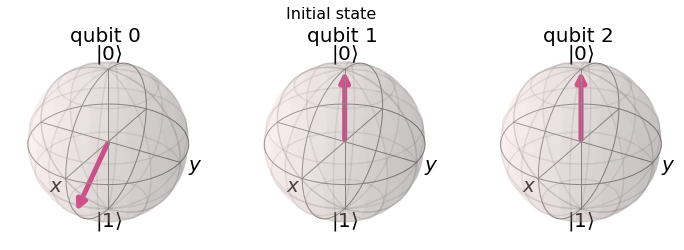

In [20]:
Initial_state = Statevector.from_instruction(qc_bit_flip)
plot_bloch_multivector(Initial_state, title='Initial state')

### Performing the encoding

In this case we want to perform this encoding:

$$\alpha |0> + \beta |1> \rightarrow \alpha |000> + \beta |111> $$

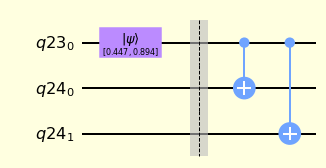

In [21]:
qc_bit_flip.cx(0,1)
qc_bit_flip.cx(0,2)
qc_bit_flip.draw(output='mpl', style=style) 

$$ |\Psi_{2}> = CNOT_{02}CNOT_{01} |\Psi_{1}>  =   \sqrt{0.2} CNOT_{02}CNOT_{01} |0>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8}  CNOT_{02}CNOT_{01}|1>_{0} |0>_{1}  |0>_{2}  $$

$$ |\Psi_{2}> =  \sqrt{0.2} |0>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8} |1>_{0} |1>_{1}  |1>_{2}   $$

### Apply some noise

In this case the x gate in the first qubit

In [22]:
qc_bit_flip.barrier()
qc_bit_flip.x(0)

$$ |\Psi_{3}> = (X \otimes I \otimes I) |\Psi_{2}> =  \sqrt{0.2} X|0>_{0} I|0>_{1}  I|0>_{2}  + \sqrt{0.8} X|1>_{0} I|1>_{1}  I|1>_{2} $$ 

$$ |\Psi_{3}> = \sqrt{0.2} |1>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8} |0>_{0} |1>_{1}  |1>_{2} $$ 

Aplying the inverse of the encoding procedure we recover the state $|\psi>$

In [23]:
qc_bit_flip.barrier()
qc_bit_flip.cx(0,2)
qc_bit_flip.cx(0,1)

$$ |\Psi_{4}> =CNOT_{01} CNOT_{02} |\Psi_{3}> = \sqrt{0.2}CNOT_{01} CNOT_{02} |1>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8}CNOT_{01} CNOT_{02} |0>_{0} |1>_{1}  |1>_{2} $$ 

$$ |\Psi_{4}> = \sqrt{0.2} |1>_{0} |1>_{1}  |1>_{2}  + \sqrt{0.8} |0>_{0} |1>_{1}  |1>_{2} $$ 


In [24]:
qc_bit_flip.barrier()
qc_bit_flip.ccx(2,1,0)

We apply the Toffoli gate.It has 3-bit inputs and outputs if the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same

$$ |\Psi_{5}> =CCNOT_{012}|\Psi_{4}> = \sqrt{0.2} CCNOT_{012}|1>_{0} |1>_{1}  |1>_{2}  + \sqrt{0.8} CCNOT_{012}|0>_{0} |1>_{1}  |1>_{2} $$ 

$$ |\Psi_{5}> = \sqrt{0.2} |0>_{0} |1>_{1}  |1>_{2}  + \sqrt{0.8} |1>_{0} |1>_{1}  |1>_{2} $$ 

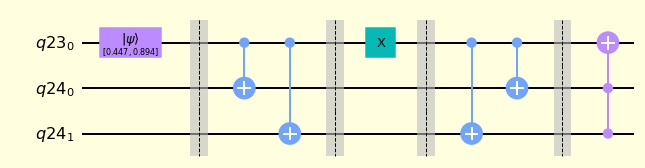

In [25]:
qc_bit_flip.draw(output='mpl', style=style) 

### Showing the final state in the Bloch sphere. 

We see that "qubit 1" and "qubit 2"  has been modified but the $|\psi>$ ("qubit 0") has been protected from the noise (X gate).

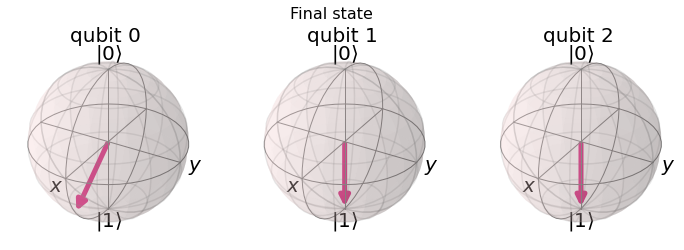

In [26]:
out_vector = execute(qc_bit_flip, backend_statevector).result().get_statevector()
plot_bloch_multivector(out_vector, title='Final state')

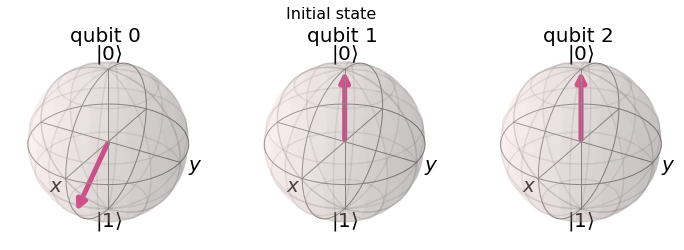

In [27]:
plot_bloch_multivector(Initial_state, title='Initial state')

# Part 3.2: The bit-flip code with measurements

In [28]:
qregister1 = QuantumRegister(1)
qregister2 = QuantumRegister(2)
cregister = ClassicalRegister(2, 'c') 

qc_bit_flip_measurements = QuantumCircuit(qregister1,qregister2,cregister)

In [29]:
qc_bit_flip_measurements.initialize(state_to_protect,0) # Apply initialisation operation to the 0th qubit

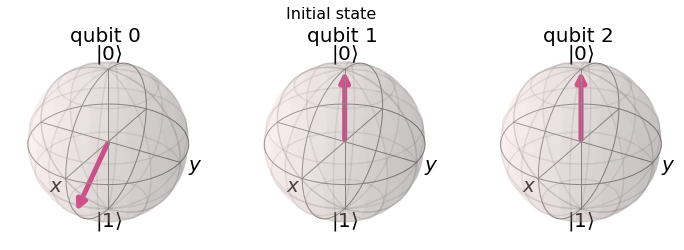

In [30]:
Initial_state1 = Statevector.from_instruction(qc_bit_flip_measurements)
plot_bloch_multivector(Initial_state1, title='Initial state')

In [31]:
### Perfmoing the encoding #####
qc_bit_flip_measurements.barrier()
qc_bit_flip_measurements.cx(0,1)
qc_bit_flip_measurements.cx(0,2)

In [32]:
### Apply some noise #####
qc_bit_flip_measurements.barrier()
#noise(qc)
qc_bit_flip_measurements.x(0)

In [33]:
### Aplying the inverse of the encoding procedure ###
qc_bit_flip_measurements.barrier()
qc_bit_flip_measurements.cx(0,2)
qc_bit_flip_measurements.cx(0,1)

Only in the case where the error occurred on the first qubit do we need to do anything: and this is the case where the measurement outcomes are both $|1>$ and so we use the Toffoli to
correct this error.This suggest that a different way to implement this error correcting circuit and that is to measure the second and third qubits and only apply the $X$ gate if the result is $11$

In [34]:
qc_bit_flip_measurements.barrier()
qc_bit_flip_measurements.measure(qregister2,cregister)

qc_bit_flip_measurements.x(0).c_if(cregister, 3)

$$ |\Psi_{4}> = \sqrt{0.2} |1>_{0} |1>_{1}  |1>_{2}  + \sqrt{0.8} |0>_{0} |1>_{1}  |1>_{2}  = \sqrt{0.2} \Big( |1>_{0}  + \sqrt{0.8} |0>_{0} \Big) |1>_{1}  |1>_{2}  $$ 

We apply the $X$ gate to the "qubit 0" if the measurement in the qubit 1 and 2 is $|1>_{1}|1>_{2}$

In this case the measurement in the qubit 1 and 2 gives $\rightarrow$ $|1>_{1}|1>_{2}$

Appling the $X$ gate to the qubit 0

$$ |\Psi_{4}> = (X \otimes I \otimes I)|\Psi_{4}> = \sqrt{0.2} \Big( X |1>_{0}  + \sqrt{0.8} X |0>_{0} \Big) I|1>_{1}  I|1>_{2}  $$ 

$$ |\Psi_{4}> = \sqrt{0.2} \Big(  |0>_{0}  + \sqrt{0.8} |1>_{0} \Big) |1>_{1}  |1>_{2}  $$ 

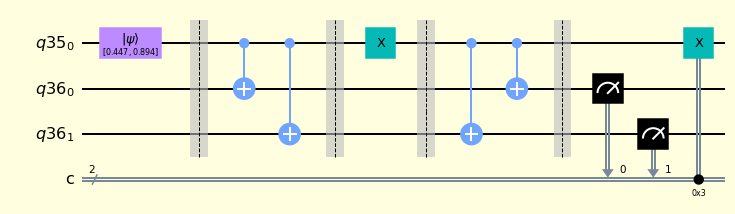

In [35]:
qc_bit_flip_measurements.draw(output='mpl', style=style) 

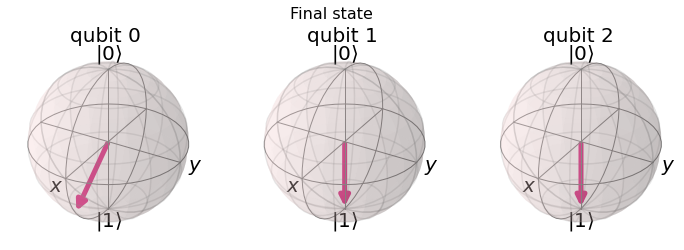

In [36]:
out_vector1 = execute(qc_bit_flip_measurements, backend_statevector).result().get_statevector()
plot_bloch_multivector(out_vector1, title='Final state')

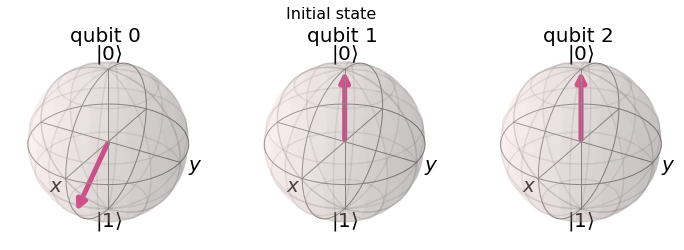

In [37]:
plot_bloch_multivector(Initial_state1, title='Initial state')

# Part 3.3: The bit-flip code with ancillas and measurements

In [38]:
qEncoding = QuantumRegister(3)
qAncillas = QuantumRegister(2, 'ancilla')
AncillasRegister = ClassicalRegister(2, 'c') 

qc_bit_flip_ancillas_measuremnts = QuantumCircuit(qEncoding,qAncillas,AncillasRegister)

In [39]:
qc_bit_flip_ancillas_measuremnts.initialize(state_to_protect,0) # Apply initialisation operation to the 0th qubit

### Showing the state $|\psi>$ ("qubit 0") in the Bloch sphere. 

"qubit 1" and "qubit 2" will be used to encode the state $|\Psi>$. "qubit 3" and "qubit 4" are the ancillas 

$$|\psi> = \sqrt{0.2} |0> + \sqrt{0.8}|1>$$ 

The initial state, $|\Psi_{1}>$ , in the circuit is:
$$|\Psi_{1}>  = |\psi> |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) = \Big( \sqrt{0.2} |0> + \sqrt{0.8}|1> \Big)|0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) $$

$$ |\Psi_{1}>  =   \sqrt{0.2} |0>_{0} |0>_{1}  |0>_{2}\Big( |0>_{a_{0}}|0>_{a_{1}} \Big)  + \sqrt{0.8}|1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) $$

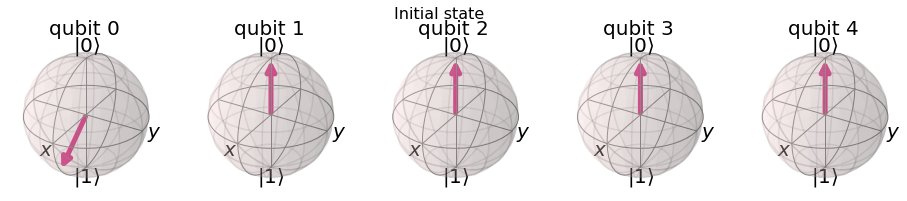

In [40]:
Initial_state2 = Statevector.from_instruction(qc_bit_flip_ancillas_measuremnts)
plot_bloch_multivector(Initial_state2, title='Initial state')

In [41]:
### Perfmoing the encoding #####
qc_bit_flip_ancillas_measuremnts.barrier()
qc_bit_flip_ancillas_measuremnts.cx(0,1)
qc_bit_flip_ancillas_measuremnts.cx(0,2)

$$ |\Psi_{2}> = CNOT_{02}CNOT_{01} |\Psi_{1}>  =   \sqrt{0.2} CNOT_{02}CNOT_{01} |0>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) + \sqrt{0.8}  CNOT_{02}CNOT_{01}|1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) $$

$$ |\Psi_{2}> =  \sqrt{0.2} |0>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big)  + \sqrt{0.8} |1>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big)  $$

In [42]:
### Apply some noise #####
qc_bit_flip_ancillas_measuremnts.barrier()
#noise(qc)
qc_bit_flip_ancillas_measuremnts.x(0)

$$ |\Psi_{3}> = \Big( X \otimes I \otimes I \otimes I \otimes I  \Big)|\Psi_{2}> =  \sqrt{0.2}\Big( X \otimes I \otimes I \otimes I \otimes I  \Big) |0>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big)  + \sqrt{0.8}  \Big( X \otimes I \otimes I \otimes I \otimes I  \Big) |1>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big)  $$

$$ |\Psi_{3}> = \sqrt{0.2} |1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) + \sqrt{0.8} |0>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) $$

In [43]:
qc_bit_flip_ancillas_measuremnts.barrier()
qc_bit_flip_ancillas_measuremnts.cx(0,4)
qc_bit_flip_ancillas_measuremnts.cx(1,4)

$$ |\Psi_{4}> = CNOT_{1,a_{1}} CNOT_{0,a_{1}} |\Psi_{3}> = \sqrt{0.2} CNOT_{1,a_{1}} CNOT_{0,a_{1}} |1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) + \sqrt{0.8} CNOT_{1,a_{1}} CNOT_{0,a_{1}} |0>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|0>_{a_{1}} \Big) $$


$$ |\Psi_{4}> = \sqrt{0.2} |1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) + \sqrt{0.8}  |0>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) $$

In [44]:
qc_bit_flip_ancillas_measuremnts.barrier()
qc_bit_flip_ancillas_measuremnts.cx(1,3)
qc_bit_flip_ancillas_measuremnts.cx(2,3)

$$ |\Psi_{5}> =  CNOT_{2,a_{0}} CNOT_{1,a_{0}} |\Psi_{4}> = \sqrt{0.2}CNOT_{2,a_{0}} CNOT_{1,a_{0}} |1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) + \sqrt{0.8} CNOT_{2,a_{0}} CNOT_{1,a_{0}} |0>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) $$


$$ |\Psi_{5}> = \sqrt{0.2} |1>_{0} |0>_{1}  |0>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) + \sqrt{0.8} |0>_{0} |1>_{1}  |1>_{2} \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) $$

In [45]:
qc_bit_flip_ancillas_measuremnts.barrier()
qc_bit_flip_ancillas_measuremnts.measure(qAncillas,AncillasRegister)

$$ |\Psi_{5}> = \Big( \sqrt{0.2} |1>_{0} |0>_{1}  |0>_{2}  + \sqrt{0.8} |0>_{0} |1>_{1} |1>_{2} \Big)  \Big( |0>_{a_{0}}|1>_{a_{1}} \Big) $$

Measurement in the ancillas qubits gives $\rightarrow$ $|0>_{a_{0}}|1>_{a_{1}}$

| Ancilla Measurement  &nbsp; &nbsp; &nbsp; |&nbsp; &nbsp; &nbsp;      Collapsed State     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;      |&nbsp; &nbsp; &nbsp;   Consequence   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;               | 
|:------------------------:|:--------------------:|:----------------------:|
|          $00$         |        $\alpha |000> + \beta |111>$          |            No error           |               
|          $01$         |        $\alpha |100> + \beta |011>$          |            An $X$ gate is applied on qubit 0           |                        
|          $10$         |        $\alpha |001> + \beta |110>$          |            An $X$ gate is appliedon qubit 2          |                        
|          $11$         |        $\alpha |010> + \beta |101>$          |            An $X$ gate is appliedon qubit 1           ||

If the ancillas measurement gives$\rightarrow$ $|0>_{a_{0}}|1>_{a_{1}}$

Apply the x gate to the "qubit 0"

In [46]:
qc_bit_flip_ancillas_measuremnts.x(0).c_if(AncillasRegister, 2)
qc_bit_flip_ancillas_measuremnts.x(1).c_if(AncillasRegister, 3)
qc_bit_flip_ancillas_measuremnts.x(2).c_if(AncillasRegister, 1)

In [47]:
qc_bit_flip_ancillas_measuremnts.barrier()
qc_bit_flip_ancillas_measuremnts.cx(0,2)
qc_bit_flip_ancillas_measuremnts.cx(0,1)

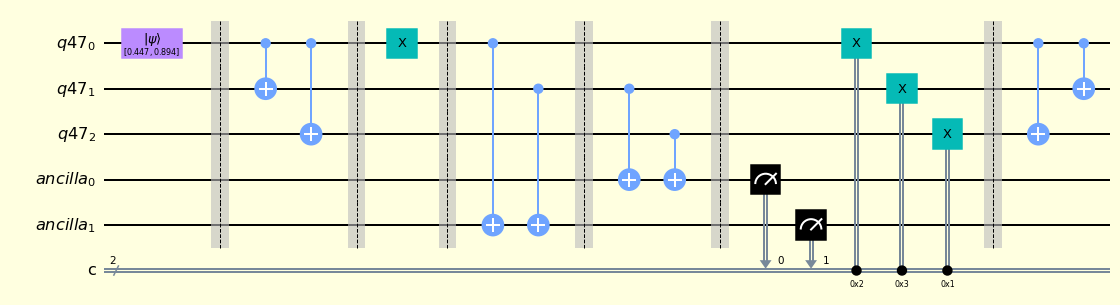

In [48]:
qc_bit_flip_ancillas_measuremnts.draw(output='mpl', style=style) 

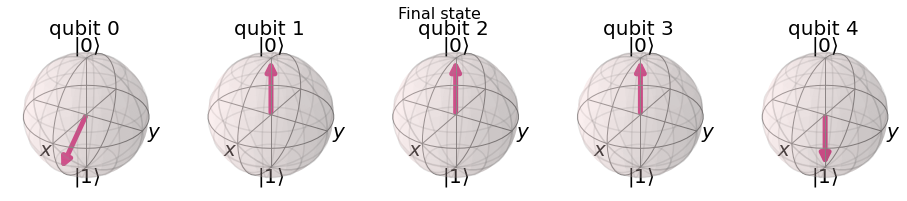

In [49]:
out_vector2 = execute(qc_bit_flip_ancillas_measuremnts,backend_statevector).result().get_statevector()
plot_bloch_multivector(out_vector2, title='Final state')

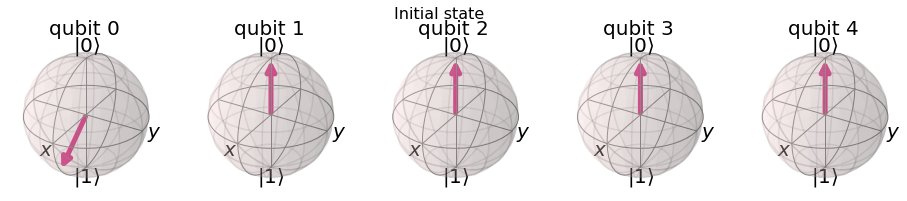

In [50]:
plot_bloch_multivector(Initial_state2, title='Initial state')

# Part 3.4: The sign-flip (phase-flip) code 

In [51]:
qregister_to_protect = QuantumRegister(1)
qregister = QuantumRegister(2)
creg = ClassicalRegister(2, 'c') 

qc_phase_flip = QuantumCircuit(qregister_to_protect,qregister,creg)

In [52]:
qc_phase_flip.initialize(state_to_protect,0) # Apply initialisation operation to the 0th qubit

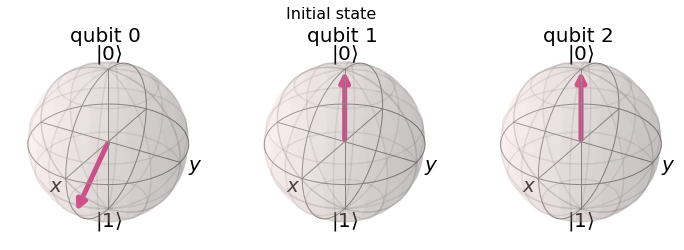

In [53]:
Initial_state3 = Statevector.from_instruction(qc_phase_flip)
plot_bloch_multivector(Initial_state3, title='Initial state')

In [54]:
### Perfmoing the encoding #####
qc_phase_flip.barrier()
qc_phase_flip.cx(0,1)
qc_phase_flip.cx(0,2)

We known that $HZH = X$. Just before to sending our information through the quantum channel and just after receiving the quantum information we should apply Hadamard gates

In [55]:
### Apply thje hadamard gates #####
qc_phase_flip.barrier()
qc_phase_flip.h(0)
qc_phase_flip.h(1)
qc_phase_flip.h(2)

In [56]:
### Apply some noise #####
qc_phase_flip.barrier()
#noise(qc)
qc_phase_flip.z(0)

qc_phase_flip.barrier()

In [57]:
### Apply thje hadamard gates #####
qc_phase_flip.h(0)
qc_phase_flip.h(1)
qc_phase_flip.h(2)

In [58]:
### Aplying the inverse of the encoding procedure ###
qc_phase_flip.barrier()

qc_phase_flip.cx(0,2)
qc_phase_flip.cx(0,1)

We apply the $X$ gate to the "qubit 0" if the measurement in the qubit 1 and 2 is $|1>_{1}|1>_{2}$

In [59]:
qc_phase_flip.barrier()
qc_phase_flip.measure(qregister,creg)

qc_phase_flip.x(0).c_if(cregister, 3)

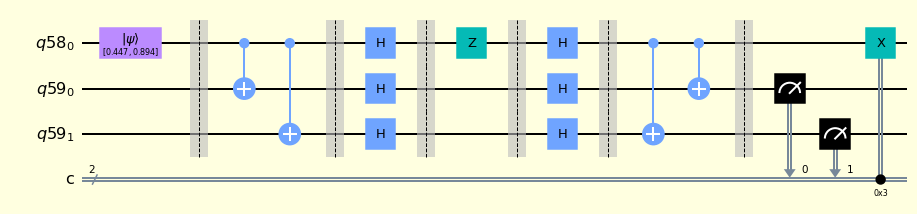

In [60]:
qc_phase_flip.draw(output='mpl', style=style) 

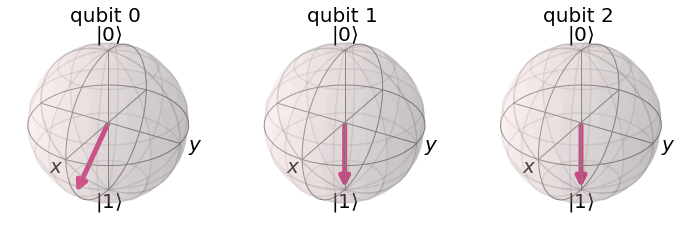

In [61]:
out_vector4 = execute(qc_phase_flip, backend_statevector).result().get_statevector()
plot_bloch_multivector(out_vector4)

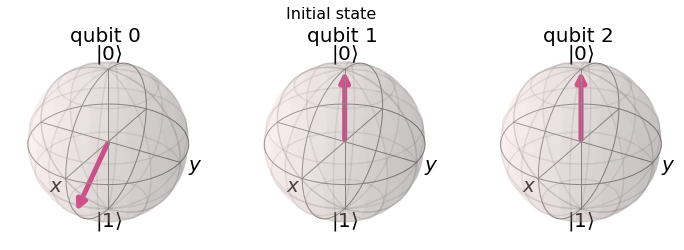

In [62]:
plot_bloch_multivector(Initial_state3, title='Initial state')

# Part 3.5: The 9-qubit error correcting code

The nine qubit error correcting code or the Shor code is able to correct a logical qubit from one bit-flip, one phase-flip or one of each.

In [63]:
qregA = QuantumRegister(1)
qr1 = QuantumRegister(2)
qregB = QuantumRegister(1)
qr2 = QuantumRegister(2)
qregC = QuantumRegister(1)
qr3 = QuantumRegister(2)
r1 = ClassicalRegister(2, 'c1') 
r2 = ClassicalRegister(2, 'c2') 
r3 = ClassicalRegister(2, 'c3') 
registerBC = ClassicalRegister(2, 'c')

qc_shor_code = QuantumCircuit(qregA, qr1,qregB, qr2,qregC,qr3,r1,r2,r3,registerBC)

In [64]:
qc_shor_code.initialize(state_to_protect,0) # Apply initialisation operation to the 0th qubit
qc_shor_code.barrier()

The initial state, $|\Psi_{1}>$ , in the circuit is:
$$|\Psi_{1}>  = |\psi> |0>_{1}  |0>_{2} |0>_{3}  |0>_{4} |0>_{5}  |0>_{6}|0>_{7}  |0>_{8} = \Big( \sqrt{0.2} |0>_{0} + \sqrt{0.8}|1>_{0} \Big)||0>_{1}  |0>_{2} |0>_{3}  |0>_{4} |0>_{5}  |0>_{6}|0>_{7}  |0>_{8}$$

$$ |\Psi_{1}>  =   \sqrt{0.2} |0>_{0} |0>_{1}  |0>_{2} |0>_{3}  |0>_{4} |0>_{5}  |0>_{6}|0>_{7}  |0>_{8}  + \sqrt{0.8}|1>_{0} |0>_{1}  |0>_{2} |0>_{3}  |0>_{4} |0>_{5}  |0>_{6}|0>_{7}  |0>_{8} $$

The state $|\psi>$ is "qubit 0"

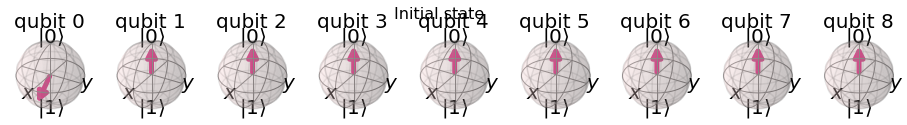

In [65]:
Initial_state4 = Statevector.from_instruction(qc_shor_code)
plot_bloch_multivector(Initial_state4, title='Initial state')

### **Performing the encoding**

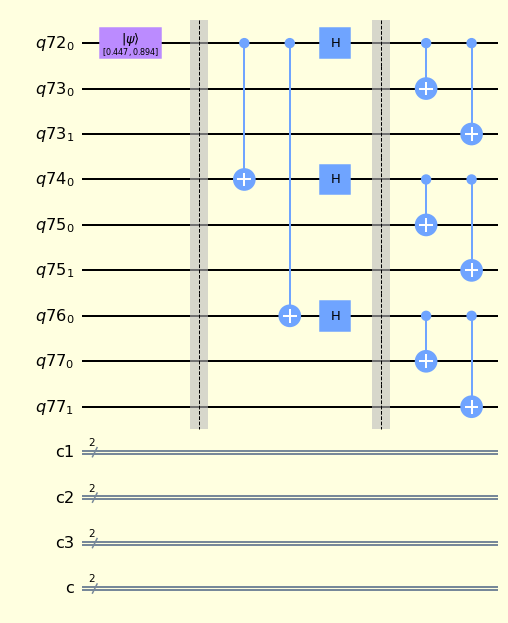

In [66]:
qc_shor_code.cx(0,3)
qc_shor_code.cx(0,6)
qc_shor_code.h(0)
qc_shor_code.h(3)
qc_shor_code.h(6)

qc_shor_code.barrier()

qc_shor_code.cx(0,1)
qc_shor_code.cx(0,2)

qc_shor_code.cx(3,4)
qc_shor_code.cx(3,5)

qc_shor_code.cx(6,7)
qc_shor_code.cx(6,8)

qc_shor_code.draw(output='mpl', style=style) 

$$ |\Psi_{2}>  = \Big( CNOT_{68} CNOT_{67} \Big) \Big( CNOT_{35} CNOT_{34} \Big) \Big( CNOT_{02} CNOT_{01} \Big) \Big( H_{6} H_{3} H_{0} \Big) \Big( CNOT_{06} CNOT_{03} \Big) |\Psi_{1}> $$

$$H_{0} = H \otimes I  \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I $$
$$H_{3} = I \otimes I  \otimes I \otimes H \otimes I \otimes I \otimes I \otimes I \otimes I $$
$$H_{6} = I \otimes I  \otimes I \otimes I \otimes I \otimes I \otimes H \otimes I \otimes I $$

$$ |\Psi_{2}>  =  \sqrt{0.2} \frac{\Big(|000> + |111>\Big) \Big(|000> + |111>\Big) \Big(|000> + |111>\Big) }{2\sqrt{2}} +  \sqrt{0.8} \frac{\Big(|000> - |111>\Big) \Big(|000> - |111>\Big) \Big(|000> - |111>\Big) }{2\sqrt{2}} $$

In [67]:
### Apply some gate error, in this case X y Z gate ###
qc_shor_code.barrier()
qc_shor_code.x(0)
qc_shor_code.z(6)

In [68]:
## This is the saame as the bit-flip code with measurements (Part 3.2) repeated  3 times ##
qc_shor_code.barrier()

qc_shor_code.cx(0,2)
qc_shor_code.cx(0,1)

qc_shor_code.cx(3,5)
qc_shor_code.cx(3,4)

qc_shor_code.cx(6,8)
qc_shor_code.cx(6,7)

qc_shor_code.barrier()
qc_shor_code.measure(qr1,r1)
qc_shor_code.measure(qr2,r2)
qc_shor_code.measure(qr3,r3)


We apply the $X$ gate to the "qubit 0" if the measurement in the qubits 1 and 2 is $|1>_{1}|1>_{2}$, or the measurement in the qubits if 4 and 5 is $|1>_{4}|1>_{5}$ , or the measurement in the qubits 7 and 8 is $|1>_{7}|1>_{8}$

In [69]:
qc_shor_code.x(qregA).c_if(r1, 3)
qc_shor_code.x(qregB).c_if(r2, 3)
qc_shor_code.x(qregC).c_if(r3, 3)

In [70]:
### Aplying the inverse of the encoding procedure ###

qc_shor_code.barrier()
qc_shor_code.h(0)
qc_shor_code.h(3)
qc_shor_code.h(6)

qc_shor_code.cx(0,6)
qc_shor_code.cx(0,3)

In [71]:
qc_shor_code.measure(qregB,registerBC[0])
qc_shor_code.measure(qregC,registerBC[1])

We apply the $X$ gate to the "qubit 0" if the measurement in the qubit 3 and 6 is $|1>_{3}|1>_{6}$

In [72]:
qc_shor_code.x(qregA).c_if(registerBC, 3)

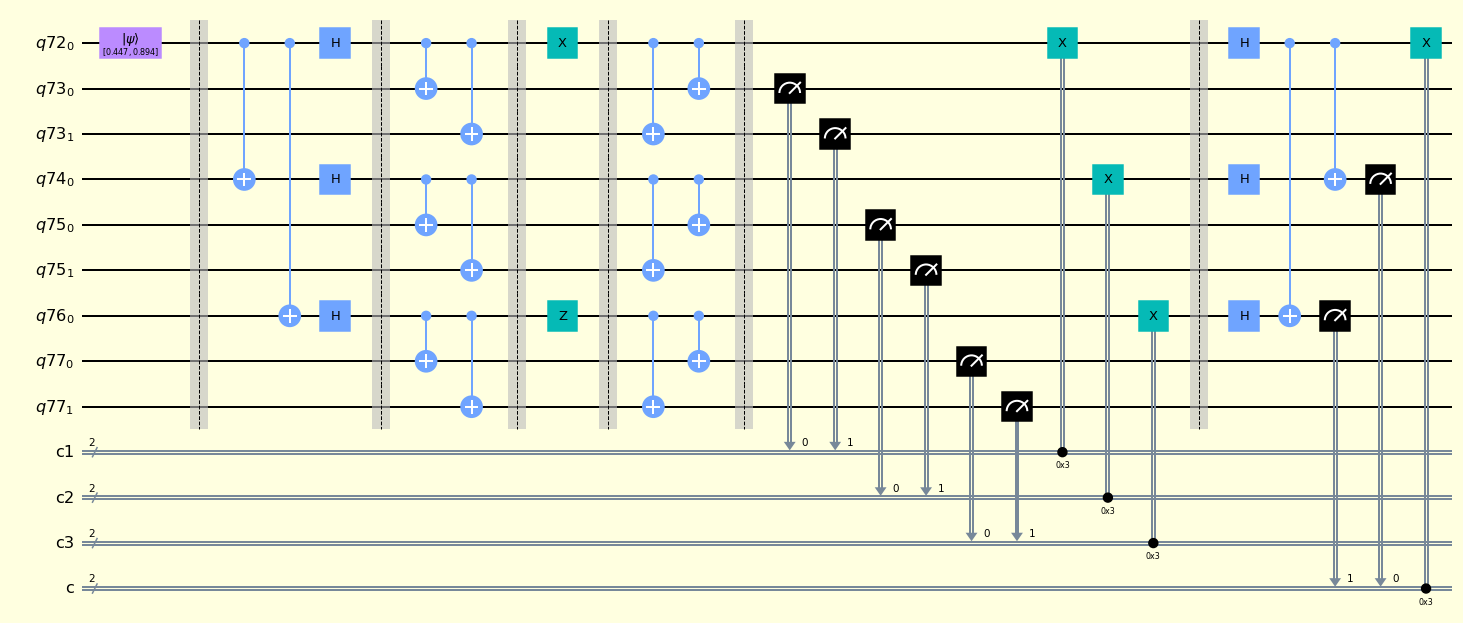

In [73]:
qc_shor_code.draw(output='mpl', style=style, fold= 30) 

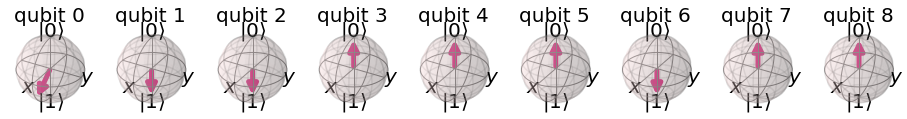

In [74]:
out_vector5 = execute(qc_shor_code,backend_statevector).result().get_statevector()
plot_bloch_multivector(out_vector5)

In [75]:
reduced_state_shor_code = partial_trace(out_vector5 , [1,2,3,4,5,6,7,8])

**We see that the state has been protected of the noise**

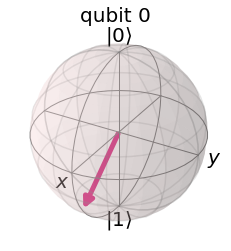

In [76]:
plot_bloch_multivector(reduced_state_shor_code)

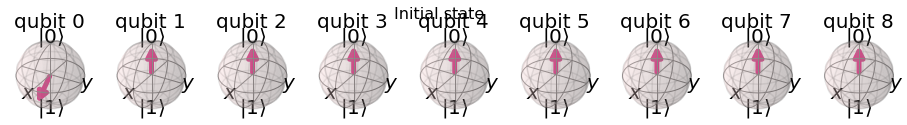

In [77]:
plot_bloch_multivector(Initial_state4, title='Initial state')

In [78]:
reduced_intial_state_shor_code = partial_trace(Initial_state4 , [1,2,3,4,5,6,7,8])

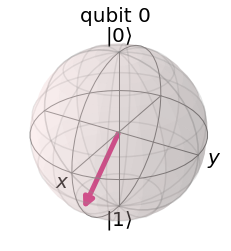

In [79]:
plot_bloch_multivector(reduced_intial_state_shor_code)

# Part 4: Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.

In [80]:
def shor_encoding(qc_shor_encode):
    ## Encoding for the shor code ##
    ################################
    qc_shor_encode.cx(0,3)
    qc_shor_encode.cx(0,6)
    qc_shor_encode.h(0)
    qc_shor_encode.h(3)
    qc_shor_encode.h(6)

    qc_shor_encode.barrier()

    qc_shor_encode.cx(0,1)
    qc_shor_encode.cx(0,2)

    qc_shor_encode.cx(3,4)
    qc_shor_encode.cx(3,5)

    qc_shor_encode.cx(6,7)
    qc_shor_encode.cx(6,8)

    qc_shor_encode.barrier()
    
    return(qc_shor_encode)

In [81]:
def shor_correct(qc_shor_code_correct,qCorrect_regA, qCorrect_r1,qCorrect_regB, qCorrect_r2,qCorrect_regC,qCorrect_r3,rCorrect1,rCorrect2,rCorrect3,registerCorrectBC ):
    ## Correction of the error in the shor code ##
    ##############################################
    qc_shor_code_correct.barrier()
    qc_shor_code_correct.cx(0,2)
    qc_shor_code_correct.cx(0,1)

    qc_shor_code_correct.cx(3,5)
    qc_shor_code_correct.cx(3,4)

    qc_shor_code_correct.cx(6,8)
    qc_shor_code_correct.cx(6,7)

    qc_shor_code_correct.barrier()
    qc_shor_code_correct.measure(qCorrect_r1,rCorrect1)
    qc_shor_code_correct.measure(qCorrect_r2,rCorrect2)
    qc_shor_code_correct.measure(qCorrect_r3,rCorrect3)

    qc_shor_code_correct.x(qCorrect_regA).c_if(rCorrect1, 3)
    qc_shor_code_correct.x(qCorrect_regB).c_if(rCorrect2, 3)
    qc_shor_code_correct.x(qCorrect_regC).c_if(rCorrect3, 3)

    qc_shor_code_correct.barrier()
    qc_shor_code_correct.h(0)
    qc_shor_code_correct.h(3)
    qc_shor_code_correct.h(6)

    qc_shor_code_correct.cx(0,6)
    qc_shor_code_correct.cx(0,3)

    qc_shor_code_correct.measure(qCorrect_regB,registerCorrectBC[0])
    qc_shor_code_correct.measure(qCorrect_regC,registerCorrectBC[1])

    qc_shor_code_correct.x(qCorrect_regA).c_if(registerCorrectBC, 3)
    
    return(qc_shor_code_correct)

In [82]:
### Ciruit to encode the state for the bit-flip code ####
q_Encoding_bit_flip_reg1 = QuantumRegister(1)
q_Encoding_bit_flip_reg2 = QuantumRegister(2)

qc_Encoding_bit_flip = QuantumCircuit(Qreg1,Qreg2)

qc_Encoding_bit_flip.cx(0,1)
qc_Encoding_bit_flip.cx(0,2)

In [83]:
### Ciruit to correct the state for the bit-flip code ####
qBit_flip_correct_register1 = QuantumRegister(1)
qBit_flip_correct_register2 = QuantumRegister(2)
cBit_flip_correct_register = ClassicalRegister(2, 'c') 

qcBit_flip_correct = QuantumCircuit(qBit_flip_correct_register1,qBit_flip_correct_register2,cBit_flip_correct_register)

qcBit_flip_correct.barrier()
qcBit_flip_correct.cx(0,2)
qcBit_flip_correct.cx(0,1)
qcBit_flip_correct.barrier()
qcBit_flip_correct.measure(qBit_flip_correct_register2,cBit_flip_correct_register)
qcBit_flip_correct.x(0).c_if(cBit_flip_correct_register, 3)
qcBit_flip_correct.barrier()

### Prepare the circuit to protect from noise

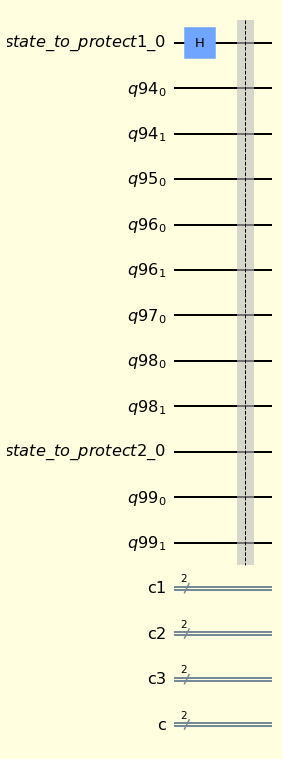

In [84]:
q_To_Protect1 = QuantumRegister(1, name = 'state_to_protect1')
qCorrect_r1 = QuantumRegister(2)
qCorrect_regB = QuantumRegister(1)
qCorrect_r2 = QuantumRegister(2)
qCorrect_regC = QuantumRegister(1)
qCorrect_r3 = QuantumRegister(2)
rCorrect1 = ClassicalRegister(2, 'c1') 
rCorrect2 = ClassicalRegister(2, 'c2') 
rCorrect3 = ClassicalRegister(2, 'c3') 
registerCorrectBC = ClassicalRegister(2, 'c')
q_To_Protect2 =  QuantumRegister(1, name = 'state_to_protect2')
qregister_test2 = QuantumRegister(2)

qbell_test = QuantumCircuit(q_To_Protect1, qCorrect_r1,qCorrect_regB, qCorrect_r2,qCorrect_regC,qCorrect_r3,rCorrect1,rCorrect2,rCorrect3,registerCorrectBC, q_To_Protect2, qregister_test2)

qbell_test.h(0)
qbell_test.barrier()
qbell_test.draw(output='mpl', style=style)

state_to_protect1_0 is the first qubit of our circuit that will generate the bell state, we apply the hadamard gate to it. The state_to_protect2_0 is the second qubit that is needed to create the bell state. These two qubits are the ones that need to be protected from noise. In the case of the first qubit we need to use the shor code to protect the state from noise like the $Z$, $X$ gate. In the case of the second one (state_to_protect2_0) the state is $|0>$ the $Z$ gate will not affect the state so we only need to protect against the bit-flips.

### Encode the states to protect

In [85]:
shor_encoding(qbell_test)

In [86]:
new_qc1 = qbell_test.compose(qc_Encoding_bit_flip,[9,10,11])

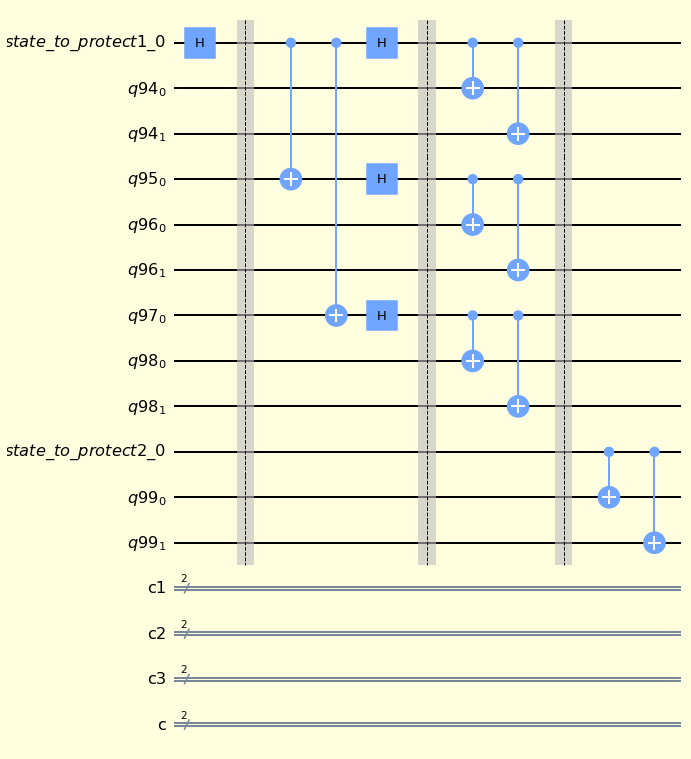

In [87]:
new_qc1.draw(output='mpl', style=style)

### Apply error gates, in this case a $X$ gate to the first qubit and a $Z$ gate to the second qubit

In [88]:
new_qc1.barrier()
new_qc1.x(0)
new_qc1.z(9)

### Apply the shor code to the first qubit and the bit flip code to the second qubit

In [89]:
new_qc2 = new_qc1.compose(qcBit_flip_correct,[9,10,11])

In [90]:
shor_correct(new_qc2,q_To_Protect1, qCorrect_r1,qCorrect_regB, qCorrect_r2,qCorrect_regC,qCorrect_r3,rCorrect1,rCorrect2,rCorrect3,registerCorrectBC)

### Apply the CNOT gate to create the bell state

In [91]:
new_qc2.barrier()
new_qc2.cx(0,9)

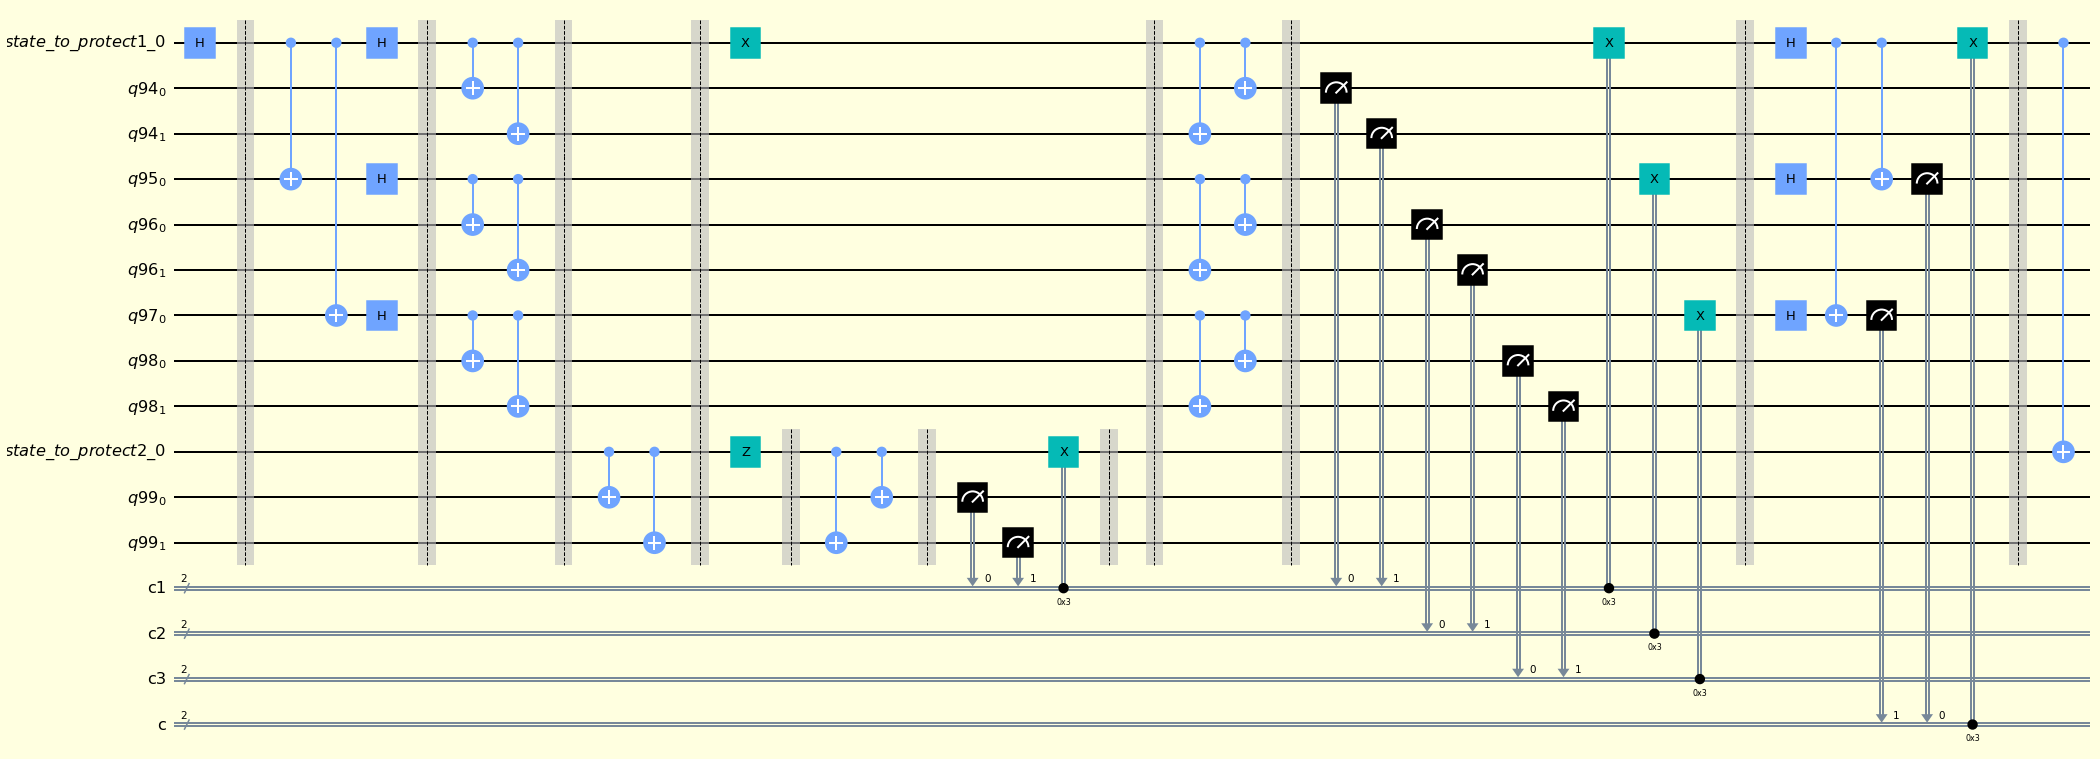

In [92]:
new_qc2.draw(output='mpl', style=style, fold= 42)

We can use the partial trace to obtain the state_to_protect1_0 and state_to_protect2_0  

$$\rho^{A} =  tr_{B}[\rho^{AB}] $$

In this case the subsystem $A$ is the state_to_protect1_0 and state_to_protect2_0 ( qubits 0 and 9) and subsystem $B$ is the qubist 1,2,3,4,5,6,7,8,10 and 11

In [93]:
out_vector8 = execute(new_qc2,backend_statevector).result().get_statevector()
reduced_state1 = partial_trace(out_vector8 , [1,2,3,4,5,6,7,8,10,11])

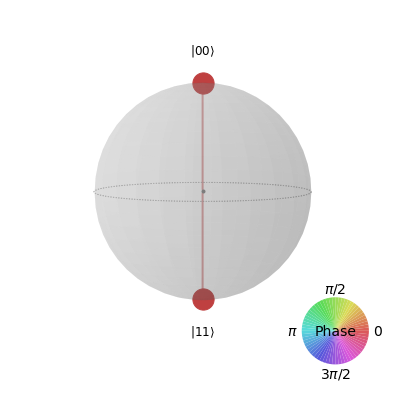

In [94]:
plot_state_qsphere(reduced_state1)

**At the end of the ciruit has created the expected bell state as shown in the qsphere**

# Error of type ZX

In [95]:
q_To_Protect1_ZX = QuantumRegister(1, name = 'state_to_protect1')
qCorrect_r1_ZX = QuantumRegister(2)
qCorrect_regB_ZX = QuantumRegister(1)
qCorrect_r2_ZX = QuantumRegister(2)
qCorrect_regC_ZX = QuantumRegister(1)
qCorrect_r3_ZX = QuantumRegister(2)
rCorrect1_ZX = ClassicalRegister(2, 'c1') 
rCorrect2_ZX = ClassicalRegister(2, 'c2') 
rCorrect3_ZX = ClassicalRegister(2, 'c3') 
registerCorrectBC_ZX = ClassicalRegister(2, 'c')
q_To_Protect2_ZX =  QuantumRegister(1, name = 'state_to_protect2')
qregister_test2_ZX = QuantumRegister(2)

qbell_test_ZX = QuantumCircuit(q_To_Protect1_ZX, qCorrect_r1_ZX,qCorrect_regB_ZX, qCorrect_r2_ZX,qCorrect_regC_ZX,qCorrect_r3_ZX,rCorrect1_ZX,rCorrect2_ZX,rCorrect3_ZX,registerCorrectBC_ZX, q_To_Protect2_ZX, qregister_test2_ZX)

qbell_test_ZX.h(0)
qbell_test_ZX.barrier()

shor_encoding(qbell_test_ZX)

new_qc1_ZX = qbell_test_ZX.compose(qc_Encoding_bit_flip,[9,10,11])

#### Error gates ######
new_qc1_ZX.barrier()
new_qc1_ZX.z(0)
new_qc1_ZX.x(9)

new_qc2_ZX = new_qc1_ZX.compose(qcBit_flip_correct,[9,10,11])

shor_correct(new_qc2_ZX,q_To_Protect1_ZX , qCorrect_r1_ZX ,qCorrect_regB_ZX, qCorrect_r2_ZX,qCorrect_regC_ZX,qCorrect_r3_ZX,rCorrect1_ZX,rCorrect2_ZX,rCorrect3_ZX,registerCorrectBC_ZX)

new_qc2_ZX.barrier()
new_qc2_ZX.cx(0,9)

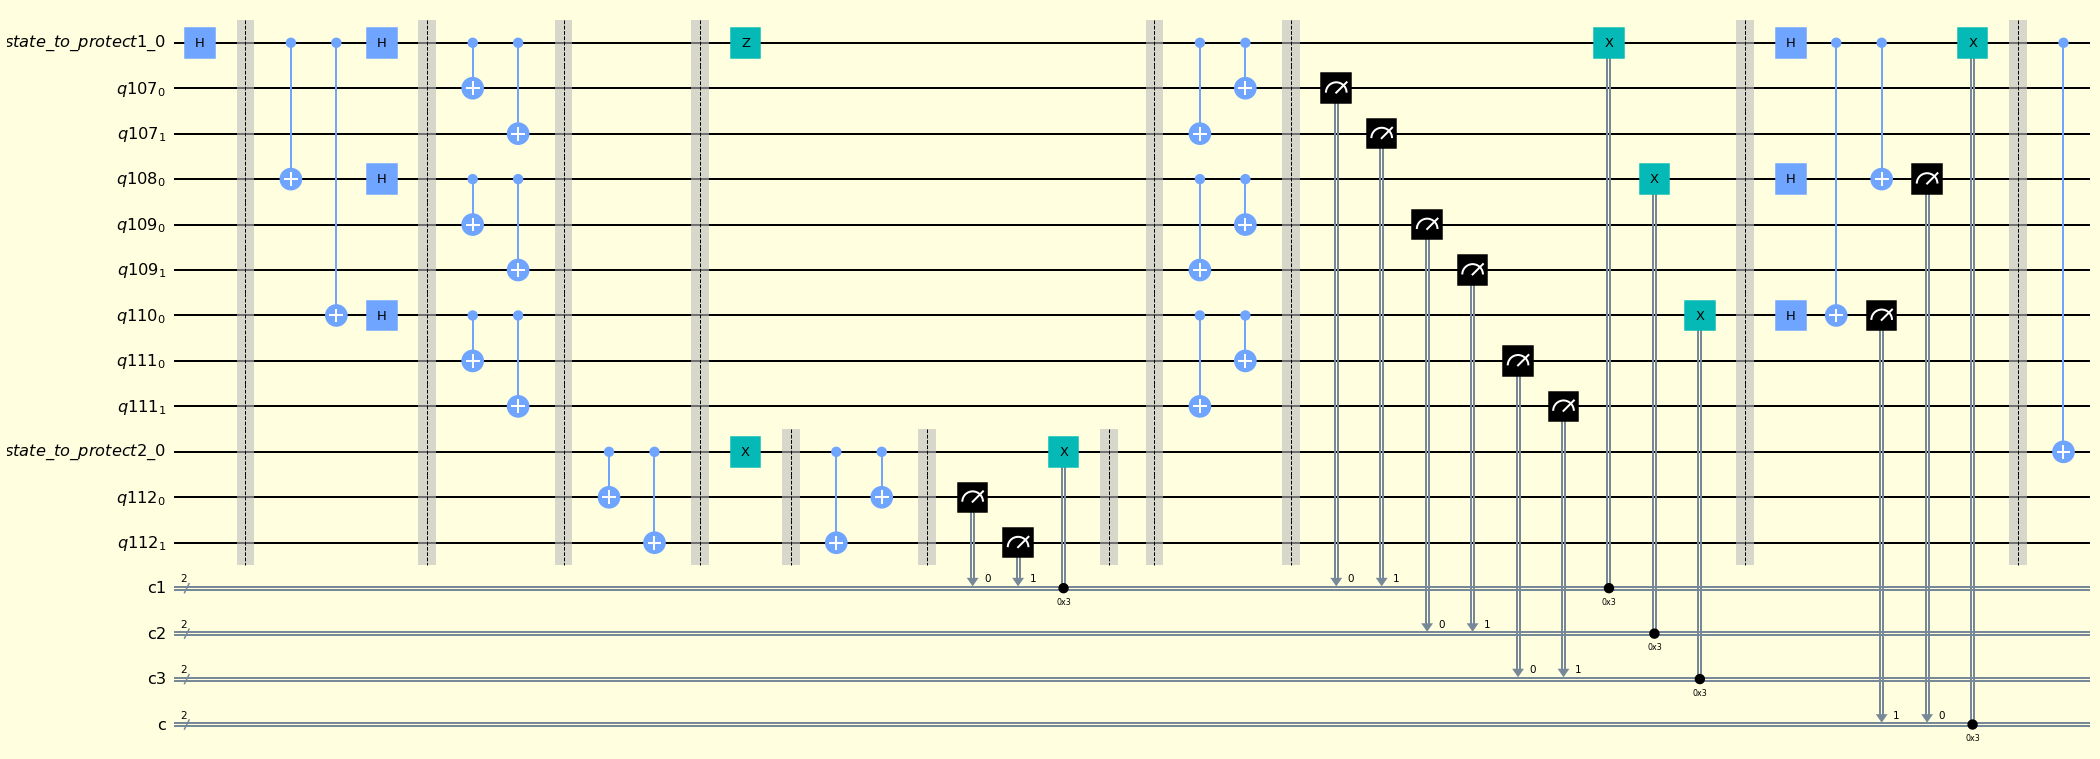

In [96]:
new_qc2_ZX.draw(output='mpl', style=style, fold= 42)

In [97]:
out_vector8 = execute(new_qc2,backend_statevector).result().get_statevector()
reduced_state1 = partial_trace(out_vector8 , [1,2,3,4,5,6,7,8,10,11])

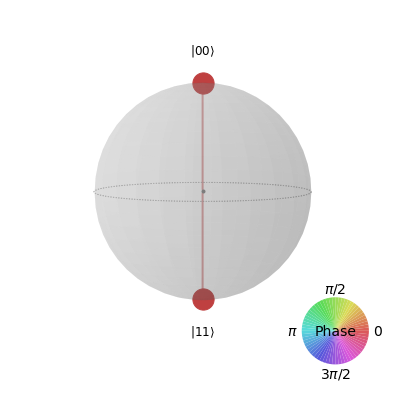

In [98]:
plot_state_qsphere(reduced_state1)

**The ciruit has created the expected bell state as shown in the qsphere. The YX error were corrected**

# Error of type YX

In [99]:
q_To_Protect1_YX = QuantumRegister(1, name = 'state_to_protect1')
qCorrect_r1_YX = QuantumRegister(2)
qCorrect_regB_YX = QuantumRegister(1)
qCorrect_r2_YX = QuantumRegister(2)
qCorrect_regC_YX = QuantumRegister(1)
qCorrect_r3_YX = QuantumRegister(2)
rCorrect1_YX = ClassicalRegister(2, 'c1') 
rCorrect2_YX = ClassicalRegister(2, 'c2') 
rCorrect3_YX = ClassicalRegister(2, 'c3') 
registerCorrectBC_YX = ClassicalRegister(2, 'c')
q_To_Protect2_YX =  QuantumRegister(1, name = 'state_to_protect2')
qregister_test2_YX = QuantumRegister(2)

qbell_test_YX = QuantumCircuit(q_To_Protect1_YX, qCorrect_r1_YX,qCorrect_regB_YX, qCorrect_r2_YX,qCorrect_regC_YX,qCorrect_r3_YX,rCorrect1_YX,rCorrect2_YX,rCorrect3_YX,registerCorrectBC_YX, q_To_Protect2_YX, qregister_test2_YX)

qbell_test_YX.h(0)
qbell_test_YX.barrier()
qbell_test_YX.draw(output='mpl', style=style)

shor_encoding(qbell_test_YX)

new_qc1_YX = qbell_test_YX.compose(qc_Encoding_bit_flip,[9,10,11])

#### Error gates ######
new_qc1_YX.barrier()
new_qc1_YX.y(0)
new_qc1_YX.x(9)

new_qc2_YX = new_qc1_YX.compose(qcBit_flip_correct,[9,10,11])

shor_correct(new_qc2_YX,q_To_Protect1_YX , qCorrect_r1_YX ,qCorrect_regB_YX, qCorrect_r2_YX,qCorrect_regC_YX,qCorrect_r3_YX,rCorrect1_YX,rCorrect2_YX,rCorrect3_YX,registerCorrectBC_YX)

new_qc2_YX.barrier()
new_qc2_YX.cx(0,9)

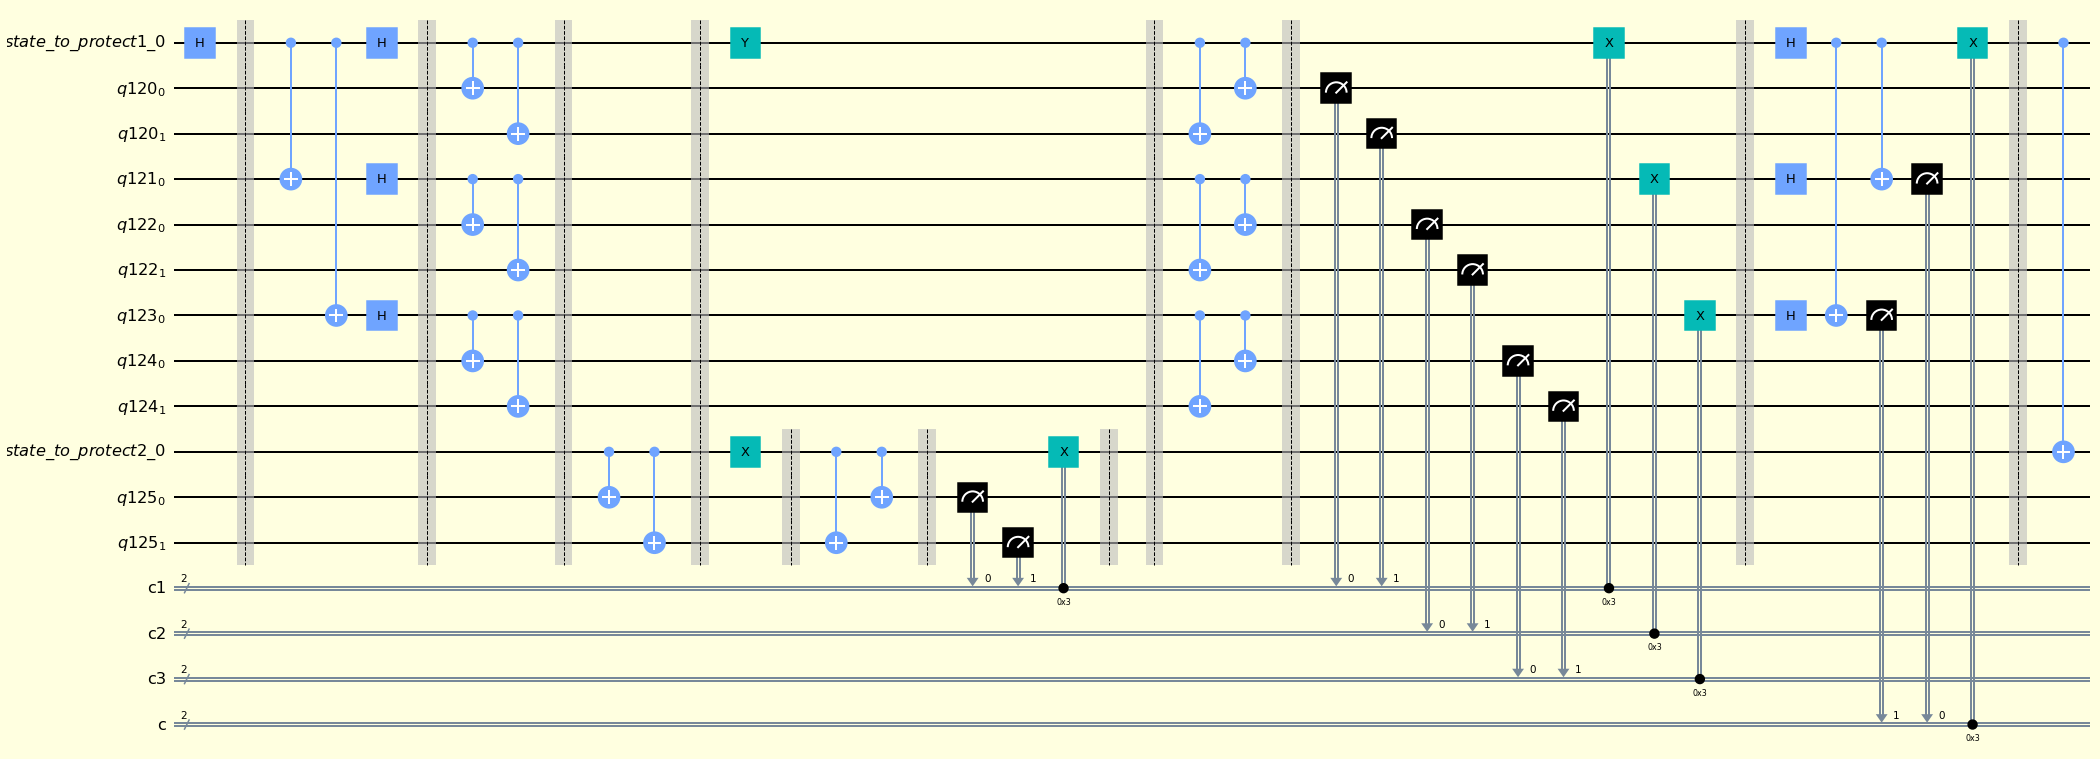

In [100]:
new_qc2_YX.draw(output='mpl', style=style, fold= 42)

In [101]:
out_vector9 = execute(new_qc2_YX,backend_statevector).result().get_statevector()
reduced_state2 = partial_trace(out_vector9 , [1,2,3,4,5,6,7,8,10,11])

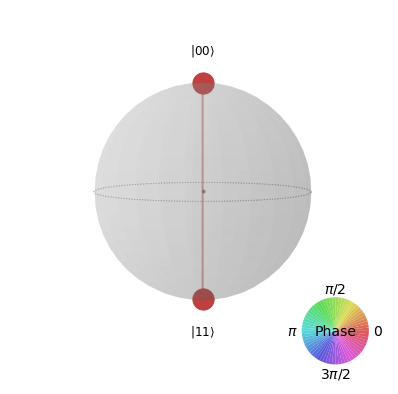

In [102]:
plot_state_qsphere(reduced_state2)

# Random error gate and their corrections

In [103]:
def random_error_gate(qcirc):
    
    if gate_errorX() == ['X']:
    ### Bit-flip in the qubit 0 #####
        qcirc.x(0)
    elif gate_errorX() == ['Z']:
    ### phase-flip in the qubit 0 #####
        qcirc.z(0)
    else:
        qcirc.i(0)
        
    if gate_errorX() == ['X']:
    ### Bit-flip in the qubit 9 #####    
        qcirc.x(9)
    elif gate_errorX() == ['Z']:
    ### phase-flip in the qubit 9 #####
        qcirc.z(9)
    else:
        qcirc.i(9)
        
    return qcirc

In [104]:
q_To_Protect1_Random = QuantumRegister(1, name = 'state_to_protect1')
qCorrect_r1_Random = QuantumRegister(2)
qCorrect_regB_Random = QuantumRegister(1)
qCorrect_r2_Random = QuantumRegister(2)
qCorrect_regC_Random = QuantumRegister(1)
qCorrect_r3_Random = QuantumRegister(2)
rCorrect1_Random = ClassicalRegister(2, 'c1') 
rCorrect2_Random = ClassicalRegister(2, 'c2') 
rCorrect3_Random = ClassicalRegister(2, 'c3') 
registerCorrectBC_Random = ClassicalRegister(2, 'c')
q_To_Protect2_Random =  QuantumRegister(1, name = 'state_to_protect2')
qregister_test2_Random = QuantumRegister(2)

qbell_test_Random = QuantumCircuit(q_To_Protect1_Random, qCorrect_r1_Random,qCorrect_regB_Random, qCorrect_r2_Random,qCorrect_regC_Random,qCorrect_r3_Random,rCorrect1_Random,rCorrect2_Random,rCorrect3_Random,registerCorrectBC_Random, q_To_Protect2_Random, qregister_test2_Random)

qbell_test_Random.h(0)
qbell_test_Random.barrier()

shor_encoding(qbell_test_Random)

new_qc1_Random = qbell_test_Random.compose(qc_Encoding_bit_flip,[9,10,11])

#### Error gates ######
new_qc1_Random.barrier()
random_error_gate(new_qc1_Random)
################################

new_qc2_Random = new_qc1_Random.compose(qcBit_flip_correct,[9,10,11])

shor_correct(new_qc2_Random,q_To_Protect1_Random , qCorrect_r1_Random ,qCorrect_regB_Random, qCorrect_r2_Random,qCorrect_regC_Random,qCorrect_r3_Random,rCorrect1_Random,rCorrect2_Random,rCorrect3_Random,registerCorrectBC_Random)

new_qc2_Random.barrier()
new_qc2_Random.cx(0,9)

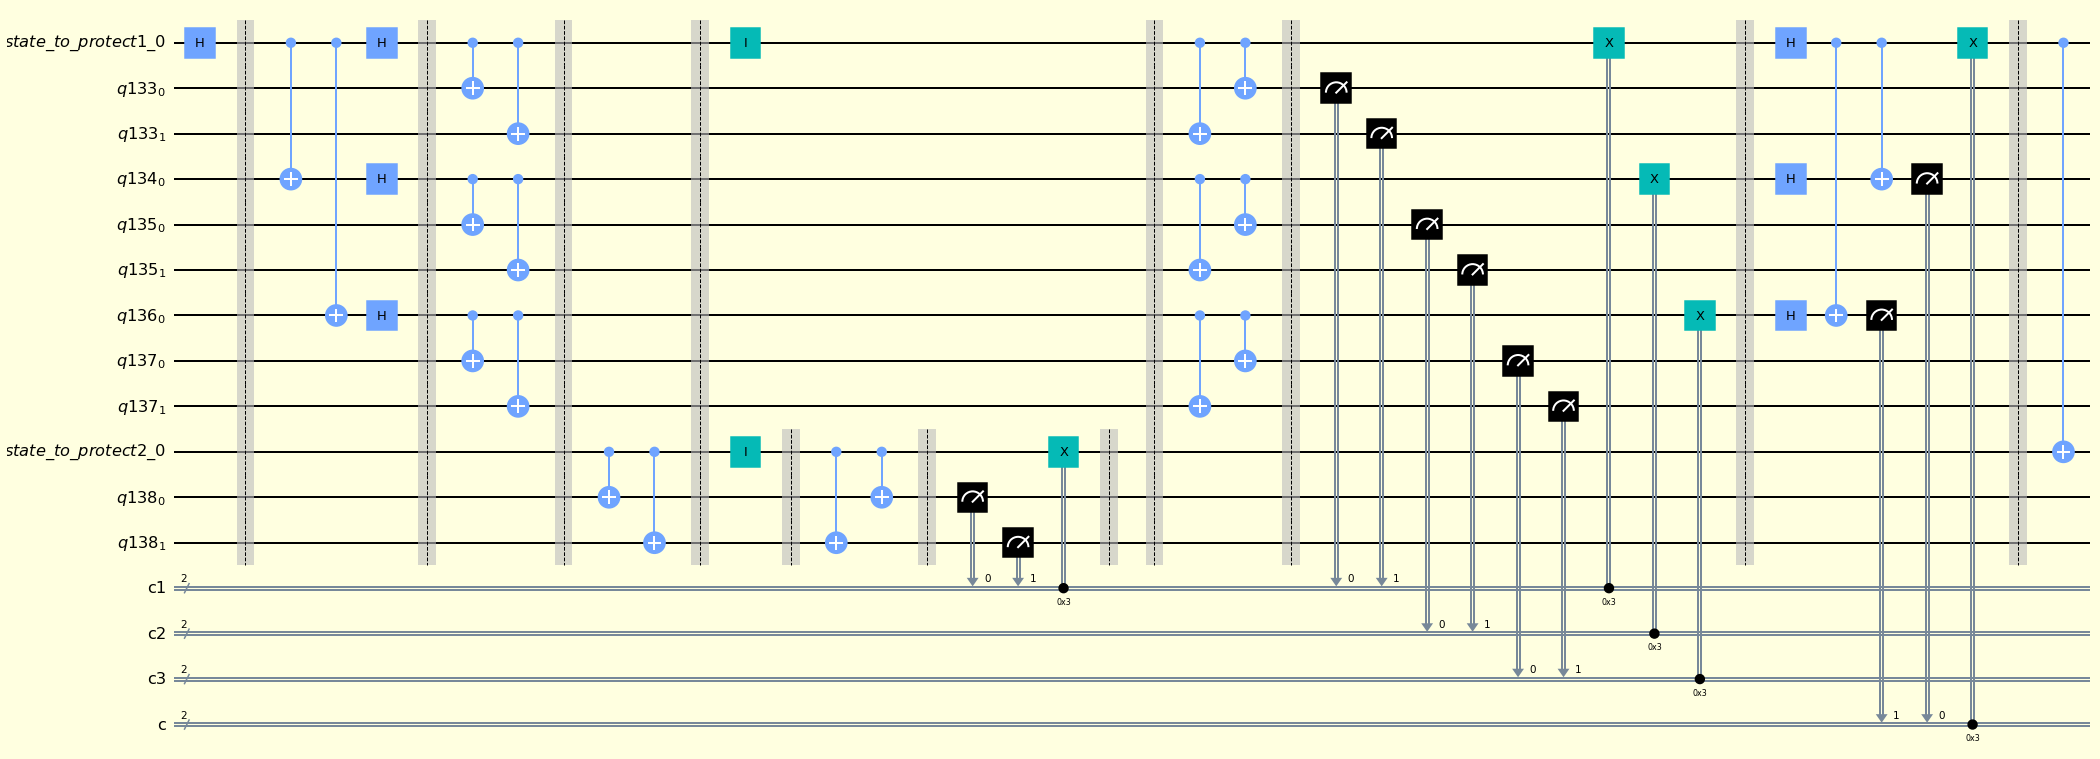

In [105]:
new_qc2_Random.draw(output='mpl', style=style, fold= 42)

In [106]:
out_vector10 = execute(new_qc2_Random,backend_statevector).result().get_statevector()
reduced_state3 = partial_trace(out_vector10 , [1,2,3,4,5,6,7,8,10,11])

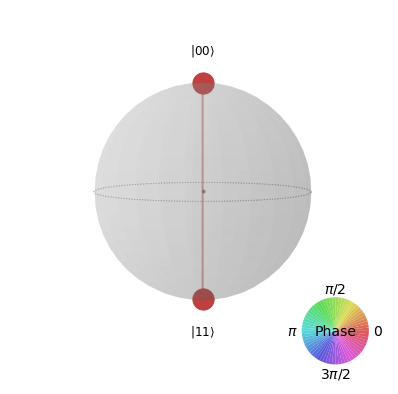

In [107]:
plot_state_qsphere(reduced_state3)

### References:

[1] Mermin N.D., Quantum Computer Science: An Introduction, Cambridge University Press, 2007 

[2] D. Bacon, http://courses.cs.washington.edu/courses/cse599d/06wi/lecturenotes16.pdf [20. february 2021]

[3] John Watrous, https://cs.uwaterloo.ca/~watrous/QC-notes/ [20. february 2021]

[4] Devitt, Simon J and Munro, William J and Nemoto, Kae. "Quantum error correction for beginners". Reports on Progress in Physics, IOP Publishing, 2013. url: http://dx.doi.org/10.1088/0034-4885/76/7/076001
